<a href="https://colab.research.google.com/github/Abelbimaw/Programming-Python/blob/main/Perancangan_FTTB_Tubes_SKO__Abel_Bima_Wiratama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TUBES SKO**

Nama : Abel Bima Wiratama

NIM : 1101184123

Kelas : TT-42-07


Pada tugas besar mata kuliah SISTEM KOMUNIKASI OPTIK saya membuat perancangan FTTB dengan skema sebagai berikut:

1.   **OLT->ODP->Roset -> ONT**
2.   **Ketinggian** 60 meter dengan perincian suatu gedung memiliki 20 lantai dan antar lantai memiliki tinggi 3 meter sehingga diperloeh ketinggian gedung 60 meter.
3.   Perhitungan **jarak** jarak dari OLT Ke Roset = 20 km, 
     jarak Roset ke ONT = 3 meter * 20 = 60 m,
     jarak Total = 20000 + 60 = 20060 m

Pada perancangan ini kami menggunakan 7 **konektor** dan 4 **spliter**, dengan **spliter** **1:8** pada **ODP ke ROSET** dengan **redaman 10.7 dB** sedangkan **spliter 1:4 OLT ke ODP** dengan **redaman 7.2 dB**. Kami menggunakan **fiber jenis G.652** yang memiliki panjang **gelombang 1310/1490 nm** dengan **redaman 0.28 dB/Km**.


In [242]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

In [243]:
#Parameter
Pt = 7 #dbm Daya Keluaran sumber optik(OLT)
SM =  6 #safety margin 6 dB
R = 0.8 # Responsivitas (A/W)
M = 1 #Tambahan daya sinyal APD (dB)
q = 1.6*10**-19
K = 1.38 * 10**23 #Konstanta Boltzman
Teff= 290 #Kelvin
B = 2.4 * 10**9 # Bandwith 2,4 Ghz 
Req = 50 # Resistensi Ekivalensi
id = 200*10**-9 #Arus gelap(A)
F = 1 #F(M), Faktor Gain

#Perhitungan jarak
#Jarak dari OLT Ke Roset = 20 km
#Jarak Roset ke ONT = 3 meter * 20 = 60 m 
#Jarak Total = 20000 + 60 = 20060 m
L = np.arange(0,20.06,0.001) #Km
Ns = 4 #jumlah sambungan
Nc = 7 #jumlah konektor
Sp = 10.7 + 7.4 #jenis PS 1:8, 1:4
Ac = 0.2 #redaman konektor(dB/buah)
As = 0.05 #redaman dB/splice
Aserat =  0.28 # redaman serat optic dB/Km G.652(1310/1490)

#lambda
NtL = lambda x: 10*np.log10(x)
LtN = lambda x: 10**(x/10)

In [244]:
 #Rumus Pr
def P_receiver():
  hambatan_fiber = L * Aserat 
  hambatan_splicer = Ns * As
  hambatan_connector = Nc * Ac
  alfa_total  = hambatan_connector + hambatan_splicer + hambatan_fiber + Sp + SM
  Pr = Pt - alfa_total
  return Pr

Pr = P_receiver()
print('Daya Terima = ', Pr,'Watt')

Daya Terima =  [-18.7     -18.70028 -18.70056 ... -24.31596 -24.31624 -24.31652] Watt


In [245]:
#Rumus Arus Primer
def arus_primer():
  Prnum = LtN(Pr)
  ip = R * Prnum
  return ip
ip = arus_primer()
print('Arus Primer = ',ip,'Watt')

Arus Primer =  [0.0107917  0.01079101 0.01079031 ... 0.00296138 0.00296119 0.002961  ] Watt


In [246]:
#RUMUS PERHITUNGAN SIGNAL POWER
def signal_power():
  sig = (ip*M)**2
  return sig
signal = signal_power()
print('Signal = ',signal,'A')

Signal =  [1.16460855e-04 1.16445839e-04 1.16430825e-04 ... 8.76976537e-06
 8.76863462e-06 8.76750403e-06] A


In [247]:
#RUMUS PERHITUNGAN NOISE POWER
def noise_power():
  BDC = 2*q*id*B*(M**2)*F #Dark Current
  SNC = 2*q*ip*B*(M**2)*F #Short Noise Current
  NT =  (4*K*Teff*B)/Req #Derau Thermanl
  noi = BDC + SNC + NT
  return noi
noise = noise_power()
print('Noise = ',noise,'A')

Noise =  [7.68384e+33 7.68384e+33 7.68384e+33 ... 7.68384e+33 7.68384e+33
 7.68384e+33] A


In [248]:
#RUMUS SNR
def snr():
  snr = signal/noise
  snr_dB = NtL(snr)
  return snr_dB
SNR = snr()
print('SNR = ',SNR,'dBm')

SNR =  [-378.19398339 -378.19454339 -378.19510339 ... -389.42590339 -389.42646339
 -389.42702339] dBm


In [249]:
#RUMUS Q
def Q_rumus():
  q_rum = 0.5*(10**(SNR/20))
  return q_rum
Q = Q_rumus()
print(Q)

[6.15560629e-20 6.15520944e-20 6.15481261e-20 ... 1.68917574e-20
 1.68906684e-20 1.68895794e-20]


In [252]:
#RUMUS BER
kali_list = []
def BER_rumus():
  akr = 1/m.sqrt(2*m.pi)*1/Q
  for i in range(len(Q)):
    kali = m.exp(-(Q[i])**2/2)
    kali_list.append(kali)
  B = akr * kali_list
  return B
B = BER_rumus()
print(B)


[6.48095836e+18 6.48137621e+18 6.48179410e+18 ... 2.36175711e+19
 2.36190938e+19 2.36206166e+19]


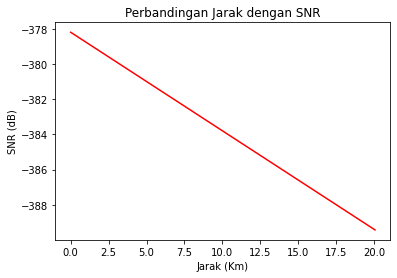

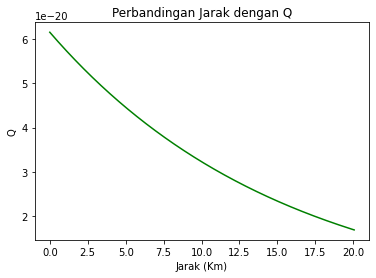

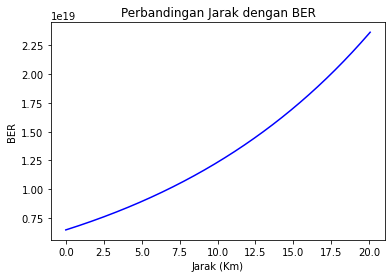

In [253]:
#GRAFIK
def grafik_snr():
  plt.figure()
  plt.plot(L,SNR,'r')
  plt.title('Perbandingan Jarak dengan SNR')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('SNR (dB)')
  plt.show()

def grafik_Q():
  plt.figure()
  plt.plot(L,Q,'g')
  plt.title('Perbandingan Jarak dengan Q')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('Q')
  plt.show()

def grafik_BER():
  plt.figure()
  plt.plot(L,B,'b')
  plt.title('Perbandingan Jarak dengan BER')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('BER')
  plt.show()

grafik_snr()
grafik_Q()
grafik_BER()